## Just a quick test to try out how inversions of canopy reflectance would work in Julia

In [1]:
# Add PATH (adapt!)
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/");
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Utils/");

In [2]:
using FluspectMod
# import Pkg; Pkg.add("Optim")
using Optim
using Plots

In [3]:
# Define start state vector, lower and upper bound:
# In order: N,Cab,Car,Ant,Cbrown,Cw,Cm,Cx,LAI
x0 = [1.1;  30.0;  10.0;  0.001 ; 0.001;  0.005 ; 0.02;  0.001;  4];
lower = [1.0; 0;0;0;0;0;0;0;0];
upper = [3.0; 120;50;0.1;0.1;0.1;0.1;0.1;6];

In [4]:
# Define pseudo-truth x
x = [1.4;  80.0;  20.0;  0.0 ; 0.0;  0.009 ; 0.012;  0.;  3];

In [5]:
# Create noisy Pseudo-measurement
y = FluspectMod.RTM_sail(x)[:,1].+0.002.*rand(length(FluspectMod.lambda));

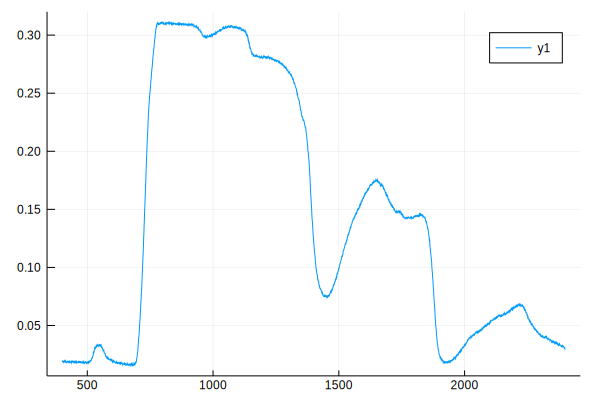

In [6]:
plot(FluspectMod.lambda,y)

In [7]:
# Define objective function (using L1 norm)
function g(x)
    R = FluspectMod.RTM_sail(x)
    return sum(abs.(R[:,1].-y))
end

g (generic function with 1 method)

In [9]:
# Minimize Function g(x)
results = optimize(g, lower, upper, x0, autodiff = :forward)

Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [1.1,30.0, ...]
 * Minimizer: [1.5086461570590608,82.43150647051858, ...]
 * Minimum: 1.086860e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: true 
     |x - x'| = 0.00e+00 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: true
     |f(x) - f(x')| = 0.00e+00 |f(x)|
   * |g(x)| ≤ 1.0e-08: false 
     |g(x)| = 1.54e+01 
   * Stopped by an increasing objective: true
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 1885
 * Gradient Calls: 1885

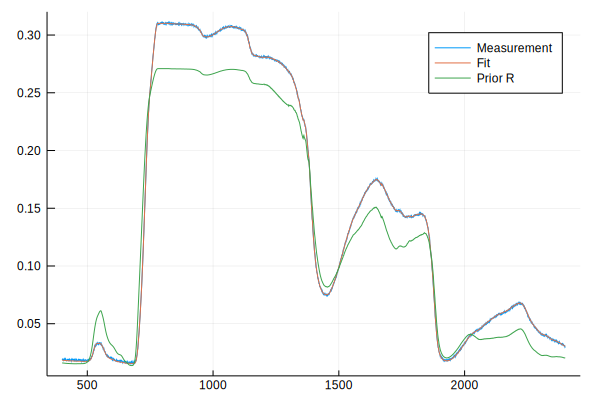

In [10]:
# Compute best fit again
RR = FluspectMod.RTM_sail(results.minimizer)
y0 = FluspectMod.RTM_sail(x0)
plot(FluspectMod.lambda,y, label="Measurement")
plot!(FluspectMod.lambda,RR[:,1], label="Fit")
plot!(FluspectMod.lambda,y0[:,1], label="Prior R")